In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, svm, preprocessing
import matplotlib.pyplot as plt

C:\Users\Shaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


Text(0, 0.5, 'Actual Price')

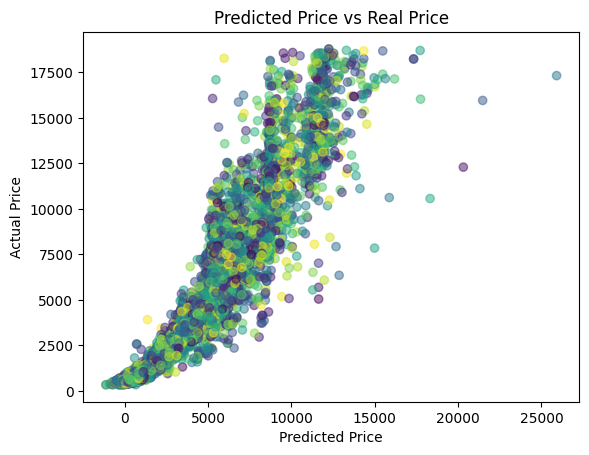

In [21]:
df = pd.read_csv('diamonds.csv')

cut_conversions = {
    'Fair':1,
    'Good':2,
    'Very Good':3,
    'Premium':4,
    'Ideal':5
}


clarity_conversions = {
    'I1':1,
    'S12':2,
    'SI1':3,
    'VS2':4,
    'VS1':5,
    'VVS2':6,
    'VVS1':7,
    'IF':8,
}


color_conversions = {
    'J':1,
    'I':2,
    'H':3,
    'G':4,
    'F':5,
    'E':6,
    'D':7
}

df['cut'] = df['cut'].map(cut_conversions)
df['clarity'] = df['clarity'].map(clarity_conversions)
df['color'] = df['color'].map(color_conversions)

df.replace(np.nan,-9999999999,inplace=True)
X = df.drop(['price'],axis=1).values
X = preprocessing.scale(X)
y = df['price'].values



X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = svm.SVR(kernel='linear')
fit = clf.fit(X_train,y_train)

clf.score(X_test,y_test)

x_s= []
y_s = []
for X,y in zip(X_test,y_test):
    prediction = clf.predict([X])[0]
    x_s.append(prediction)
    y_s.append(y)
    
    
    
colors = np.random.rand(len(x_s))
plt.scatter(x_s,y_s,alpha=0.5, c=colors)
plt.title('Predicted Price vs. Real Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')